In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/new_cleaned.csv")

In [101]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [102]:
df.describe()

,WS,ORtg,DRtg,PER,TRB%,AST%,STL%,TOV%,USG%,Age,...,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,PLAY_PTS,Performance1,Performance2
count,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,...,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,352.000000,352.000000
mean,-1.564405e-16,1.436982e-15,3.683922e-16,4.289498e-17,-2.195214e-16,-1.261617e-17,1.387779e-16,-1.841961e-16,-2.472769e-16,-6.812732e-16,...,-1.791496e-16,-5.576347e-16,-2.018587e-16,5.929600e-17,-1.201059e-15,1.667858e-15,-1.000462e-15,3.027881e-17,0.653409,0.326705
std,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,...,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,1.001423e+00,0.723469,0.469676
min,-2.058905e+00,-2.859433e+00,-3.992502e+00,-2.022379e+00,-1.459396e+00,-1.423847e+00,-2.089552e+00,-2.396857e+00,-2.030480e+00,-1.922953e+00,...,-1.743785e+00,-1.803014e+00,-3.601972e+00,-2.449386e+00,-3.406087e+00,-2.794753e+00,-2.649103e+00,-1.695364e+00,0.000000,0.000000
25%,-7.264495e-01,-7.078208e-01,-6.281854e-01,-7.415939e-01,-8.115987e-01,-7.785517e-01,-7.419097e-01,-7.082996e-01,-7.645989e-01,-8.105128e-01,...,-7.877538e-01,-6.563515e-01,-6.835961e-01,-2.456538e-01,-5.595604e-01,-6.249810e-01,-6.713722e-01,-7.523069e-01,0.000000,0.000000
50%,-1.099972e-01,-1.699177e-01,-5.378991e-02,-1.829409e-01,-2.400132e-01,-2.495758e-01,-1.869983e-01,-7.318890e-02,-7.288004e-02,-1.152380e-01,...,-1.769561e-01,-2.497544e-01,-1.188820e-01,3.696918e-01,1.656435e-01,-5.275480e-02,-1.443253e-01,-1.657712e-01,1.000000,0.000000
75%,5.614956e-01,5.640960e-01,6.847186e-01,5.250782e-01,7.099075e-01,6.034326e-01,6.057323e-01,5.695279e-01,6.180603e-01,5.800369e-01,...,5.705755e-01,4.240073e-01,5.461340e-01,5.957448e-01,7.490477e-01,5.975910e-01,5.575342e-01,5.610730e-01,1.000000,1.000000
max,3.592546e+00,3.595404e+00,2.654074e+00,3.375973e+00,3.214904e+00,4.104090e+00,3.935201e+00,3.520701e+00,3.132694e+00,3.222081e+00,...,2.806215e+00,3.875695e+00,3.784652e+00,2.753465e+00,2.510064e+00,3.802448e+00,3.957248e+00,3.288272e+00,2.000000,1.000000


In [103]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
from sklearn.metrics import f1_score
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split into input and output variables
# , 'Pos_0', 'Pos_1', 'Pos_2', 'Pos_3', 'Pos_4', 'Age', 'BLK', 'ORB', 'STL', 'DRB', 'TRB'
X = df.drop(['Performance1', 'Performance2', 'PLAY_PTS'], axis=1)
y = df['Performance1']

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010110011, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1010110011, shuffle=True)

# Resample training data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=15, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_res.shape[1],)),
    tf.keras.layers.Dense(units=10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# Define optimizer with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile model with optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train model
history = model.fit(X_train_res, y_train_res, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 1.5356 - accuracy: 0.3302 - val_loss: 1.5414 - val_accuracy: 0.5263
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4877 - accuracy: 0.3365 - val_loss: 1.5010 - val_accuracy: 0.5439
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4584 - accuracy: 0.3428 - val_loss: 1.4760 - val_accuracy: 0.5088
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.4371 - accuracy: 0.3805 - val_loss: 1.4576 - val_accuracy: 0.5088
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4191 - accuracy: 0.4088 - val_loss: 1.4393 - val_accuracy: 0.4737
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4010 - accuracy: 0.4497 - val_loss: 1.4234 - val_accuracy: 0.4737
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3838 - accuracy: 0.4528 - val_loss: 1.4100 - val_accuracy: 0.4386
Epoch 8/100


In [104]:
# Evaluate model on test data
y_pred = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
f1 = f1_score(y_test, y_pred.argmax(axis=1), average='weighted')

# Print model performance metrics
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"F1 score: {f1:.4f}")

3/3 [==============================] - 0s 2ms/step - loss: 1.2099 - accuracy: 0.6056
Test loss: 1.2099
Test accuracy: 0.6056
F1 score: 0.6183


In [105]:
# import shap

# # Compute Shapley values for a test instance
# test_instance = X_test.iloc[0]
# background = X_train.sample(100)
# explainer = shap.KernelExplainer(model.predict, background)
# shap_values = explainer.shap_values(test_instance)
# print(shap_values)

3/3 [==============================] - 0s 1ms/step


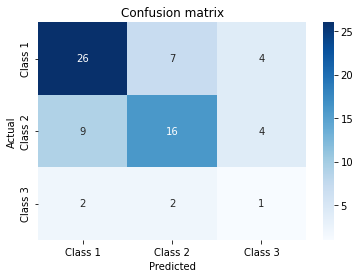

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use the model to predict the class of each test observation
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()


In [107]:
# # Get the weights for each layer
# weights = model.get_weights()

# # Print the weights for each layer
# for i, layer in enumerate(model.layers):
#     layer_weights = weights[i*2]  # Select the weight matrix for the layer
#     print(f"Weights for layer {i+1} ({layer.name}):")
#     print(layer_weights)


In [108]:
# output_weights = weights[-2]  # Select the weight matrix for the output layer
# print("Learned weights for output layer:")
# print(output_weights)

In [109]:
# import seaborn as sns

# sns.set(rc={'figure.figsize':(6, 6)})

# # Get the weight matrix of the first layer
# W = model.layers[0].get_weights()[0]

# # Create a heatmap of the weight matrix
# sns.heatmap(W, cmap='coolwarm', center=0, annot=True)


In [110]:
# import seaborn as sns


# sns.set(rc={'figure.figsize':(6, 6)})

# # Get weights from trained model
# weights = model.get_weights()

# # Create a heatmap using Seaborn
# ax = sns.heatmap(weights[0], cmap="YlGnBu")

# # Set axis labels
# ax.set_xlabel('Input')
# ax.set_ylabel('Hidden Units')

# # Show the plot
# plt.show()

Feature ranking:
1. AST (0.055341)
2. GS (0.048284)
3. STL (0.040947)
4. AST% (0.040042)
5. eFG% (0.038387)
6. TS% (0.034896)
7. STL% (0.033832)
8. MP (0.033607)
9. ORB (0.032796)
10. Age (0.029250)
11. G (0.027520)
12. FG% (0.027371)
13. PF (0.027134)
14. FT (0.027112)
15. USG% (0.026840)
16. TOV% (0.026313)
17. FTA (0.025621)
18. DRB (0.025612)
19. TRB (0.025449)
20. FT% (0.025409)
21. DRtg (0.025370)
22. 2P% (0.024431)
23. ORtg (0.024182)
24. BLK (0.024033)
25. TRB% (0.023869)
26. 3PA (0.023747)
27. FGA (0.022354)
28. PTS (0.021730)
29. 3P (0.021456)
30. PER (0.021319)
31. 3P% (0.020906)
32. 2PA (0.020688)
33. TOV (0.020518)
34. 2P (0.018986)
35. WS (0.017462)
36. FG (0.017184)


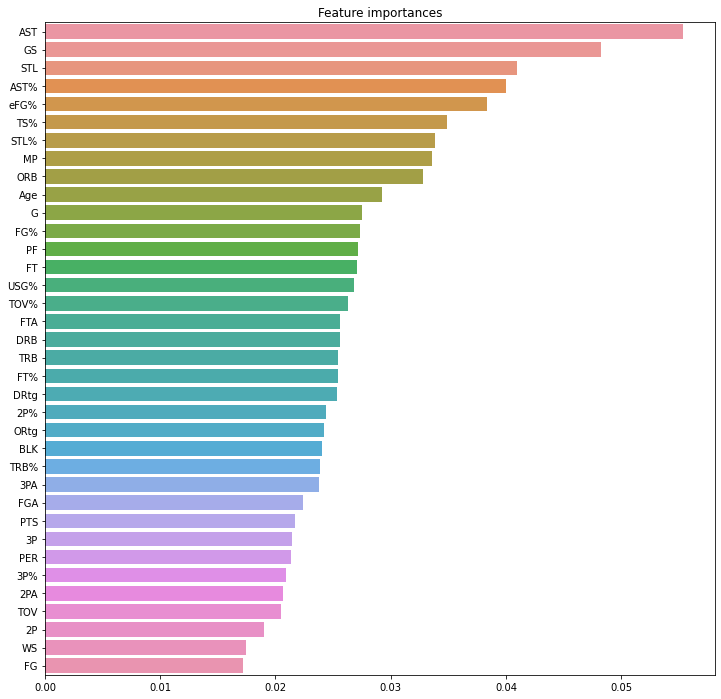

In [111]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot feature importances
plt.figure(figsize=(12, 12))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title("Feature importances")
plt.show()


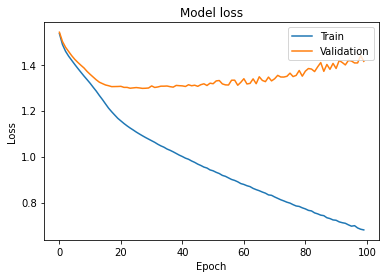

In [112]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


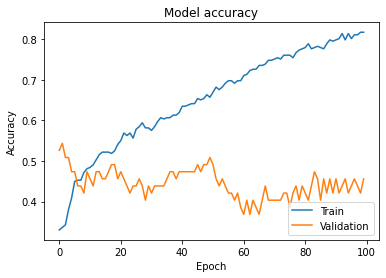

In [113]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [132]:
model.summary(print_fn=lambda x: print(x.replace('Param #', 'Parameters')))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Parameters   
 dense_32 (Dense)            (None, 15)                555       
                                                                 
 dense_33 (Dense)            (None, 10)                160       
                                                                 
 dense_34 (Dense)            (None, 5)                 55        
                                                                 
 dense_35 (Dense)            (None, 3)                 18        
                                                                 
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


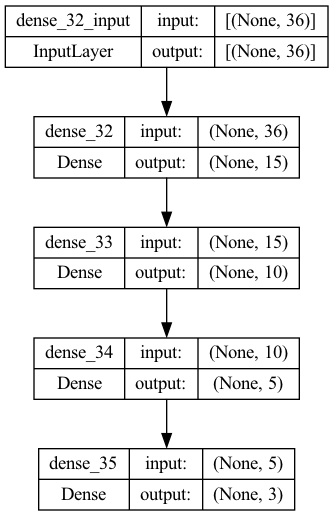

In [136]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [137]:
from tabulate import tabulate

summary = []
for layer in model.layers:
    summary.append([layer.name, layer.input_shape, layer.output_shape, layer.count_params()])

print(tabulate(summary, headers=['Layer', 'Input Shape', 'Output Shape', 'Param #']))

Layer     Input Shape    Output Shape      Param #
--------  -------------  --------------  ---------
dense_32  (None, 36)     (None, 15)            555
dense_33  (None, 15)     (None, 10)            160
dense_34  (None, 10)     (None, 5)              55
dense_35  (None, 5)      (None, 3)              18


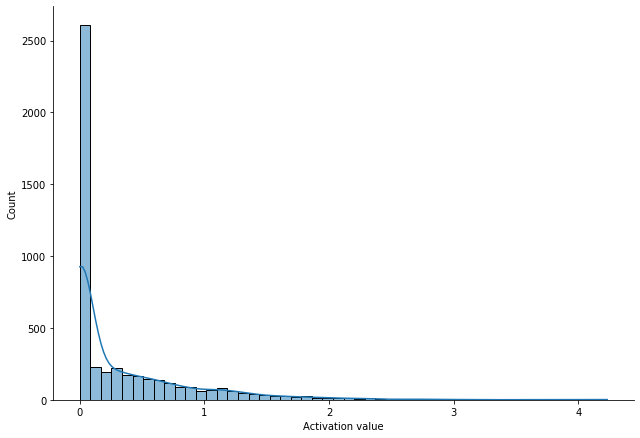

In [131]:
get_activations = tf.keras.backend.function([model.layers[0].input], [model.layers[0].output])

# Get the activations for the training set
activations = get_activations(X_train_res.values.reshape(-1, X_train_res.shape[1]))[0]

# Plot the distribution of the activations
import seaborn as sns

# Create a FacetGrid with the histogram
g = sns.displot(activations.flatten(), bins=50, kde=True, height=6, aspect=1.5)

# Set the label of the x-axis
g.set_axis_labels("Activation value", "Count")

# Show the plot
plt.show()
